In [1]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


In [2]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [3]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import py_compile

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Outline
Built-in Data Structures
Numpy array
Pandas Series/DataFrame
Plotting and "Real-World" Analyses
Data Structures
Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms will almost always be self-evident. Data structures, not algorithms, are central to programming.

Notes on Programming in C, by Rob Pike.


## Lists

In [4]:
assert ran_the_first_cell, "Oh noes!"

In [5]:
assert ran_the_first_cell, "Oh yeah!"

In [6]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [7]:
l = [1, 'two', 3.0, "four", 5.0, "six"]
l

[1, 'two', 3.0, 'four', 5.0, 'six']

In [8]:
[1, 'two', 3.0, 4, 5.0, 'six']

[1, 'two', 3.0, 4, 5.0, 'six']

In [9]:
[1, 'two', 3.0, "four", 5.0, 'six']

[1, 'two', 3.0, 'four', 5.0, 'six']

In [10]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [11]:
# Lists can be indexed like C-style arrays.
first = l[0]
third = l[2]
print("first:", first)
print("third:", third)

first: 1
third: 3.0


In [12]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [13]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
antepenultimate = l[-3]
print("last:", last)
print("third to last:", antepenultimate)

last: six
third to last: four


In [14]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [15]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:4]
sublist

['two', 3.0, 'four']

In [16]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [17]:
# l[:N] is equivalent to l[0:N].
first_three = l[-1:3]
first_three

[]

In [18]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

['four', 5.0, 'six']

In [19]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[4:]
after_three

[5.0, 'six']

In [20]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [21]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:3]

['b', 'e']

In [22]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [23]:
# This is a cute way to reverse a list.
l[::-2]

['h', 'f', 'd', 'b']

In [24]:

# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [25]:

# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)
l.append(7)
print("LongAfter:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']
LongAfter: [1, 2, 3, 4, 5, 'six', 7]


In [26]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [27]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5, 6]
[x * 3 for x in l]

[3, 6, 9, 12, 15, 18]


## Review: Python Lists
Zero-indexed sequence of arbitrary 
Python values.

Slicing syntax: l[start:stop:step] copies elements at regular intervals from start to stop.

Efficient (O(1)) appends and removes from end.

Comprehension syntax: [f(x) for x in l if cond(x)].

## Dictionaries

In [28]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [29]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell', 'James':'Hommes'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant', 'James': 'Hommes'}

In [30]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'James': 'Hommes',
 'Ludwig': 'Wittgenstein'}

In [31]:
# Like lists, dictionaries are size-mutable.
philosophers['Paulo'] = 'Coehlo'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'James': 'Hommes',
 'Ludwig': 'Wittgenstein',
 'Paulo': 'Coehlo'}

In [32]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell',
 'Immanuel': 'Kant',
 'James': 'Hommes',
 'Ludwig': 'Wittgenstein',
 'Paulo': 'Coehlo'}

In [33]:
del philosophers['Paulo']
philosophers

{'Bertrand': 'Russell',
 'Immanuel': 'Kant',
 'James': 'Hommes',
 'Ludwig': 'Wittgenstein'}

In [34]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [35]:
# No slicing.
philosophers['James':'Hommes']

TypeError: ignored

## Review: Python Dictionaries
Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.

Efficient (O(1)) lookup, insertion, and deletion.

No slicing (would require a notion of order).

In [36]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [37]:
# Suppose we have some matrices...
x = [[1, 2, 3],
     [2, 3, 4],
     [2, 2, 2],
     [1, 1, 1]]

y = [[1, 2, 3, 4, 9],
     [2, 3, 4, 5, 8]]

In [38]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [39]:
def matmuler(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [40]:
%%time

matmul(a, b)

CPU times: user 27 µs, sys: 5 µs, total: 32 µs
Wall time: 36.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [41]:
%%time

matmuler(x, y)

CPU times: user 30 µs, sys: 6 µs, total: 36 µs
Wall time: 39.3 µs


[[5, 8, 11, 14, 25],
 [8, 13, 18, 23, 42],
 [6, 10, 14, 18, 34],
 [3, 5, 7, 9, 17]]

In [42]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5411336069751818, 0.7611472983691383, 0.20339037736207288],
 [0.9163561297392407, 0.27699946566197087, 0.6911853683111933]]

In [43]:
import random
def random_half_matrix(m, n):
    out = []
    cont = 0
    for row in range(m):
        out.append([random.random() for _ in range(n)])
        if (cont >= (m/2)):
            out.append([0 for _ in range(n)])
        cont += 1
    return out

randm = random_half_matrix(2, 3)
randm

[[0.8164080463513683, 0.1095478844965625, 0.8031739112945069],
 [0.2463179107825073, 0.22866635424783965, 0.2783545189933989],
 [0, 0, 0]]

In [44]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.91 s, sys: 12.1 ms, total: 5.92 s
Wall time: 5.95 s


In [45]:
%%timeit
randa = random_half_matrix(1, 1)
randb = random_half_matrix(1, 1)
x = matmuler(randa, randb)

The slowest run took 4.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.5 µs per loop


In [46]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [47]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product_mas_1(xs, ys):
    return sum(x * y for x, y in zip(xs, ys) +1)

In [48]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [49]:
%%fortran
subroutine fortran_dot_product_mas_1(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum((xs * ys)+1)
end

In [50]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [51]:
list_data2 = [float(i) for i in range(99999999)]
array_data2 = np.array(list_data2)

In [52]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.28 ms, sys: 1.94 ms, total: 11.2 ms
Wall time: 12.9 ms


333328333350000.0

In [53]:
%%time
python_dot_product(list_data2, list_data2)

CPU times: user 7.36 s, sys: 4.84 ms, total: 7.37 s
Wall time: 7.39 s


3.333333183334634e+23

In [54]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 144 µs, sys: 10 µs, total: 154 µs
Wall time: 348 µs


333328333350000.0

In [55]:
%%time
fortran_dot_product(array_data2, array_data2)

CPU times: user 136 ms, sys: 0 ns, total: 136 ms
Wall time: 141 ms


3.333333183334634e+23

## Why is the Python Version so Much Slower?

In [56]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [57]:
def div_elemwise(xs, ys):
    return [((x * y)+2*y) for x, y in zip(xs, ys)]

div_elemwise([1, 2, 30, 10], [1, 2 + 0j, 3.2, 'four'])

[3, (8+0j), 102.4, 'fourfourfourfourfourfourfourfourfourfourfourfour']

In [58]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [59]:
# Interpretation overhead.
source_code = 'a + b * c - f ^ h'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 LOAD_NAME                3 (f)
             12 BINARY_SUBTRACT
             14 LOAD_NAME                4 (h)
             16 BINARY_XOR
             18 RETURN_VALUE


## Why is the Python Version so Slow?
Dynamic typing means that every single operation requires dispatching on the input type.

Having an interpreter means that every instruction is fetched and dispatched at runtime.

Other overheads:

* Arbitrary-size integers.
* Reference-counted garbage collection


---

This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.


## What Do We Do?
* Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...
* ...but often, we just want to do the same thing over and over in a loop!
* If we don't need Python's dynamicism, we don't want to pay (much) for it.
* **Idea**: **Dispatch once per operation** instead of **once per element.**

In [60]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [61]:
import numpy as nup

data2 = nup.array([1, 2, 3, 4, 6, 7])
data2

array([1, 2, 3, 4, 6, 7])

In [62]:
data + data

array([2, 4, 6, 8])

In [63]:
data2 + data2

array([ 2,  4,  6,  8, 12, 14])

In [64]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 336 µs, sys: 1.02 ms, total: 1.36 ms
Wall time: 1.62 ms


333328333350000.0

In [65]:
%%time
# Naive pow product
(array_data ** array_data).sum()

CPU times: user 9.49 ms, sys: 1.11 ms, total: 10.6 ms
Wall time: 16 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


inf

In [66]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.88 ms, sys: 2.2 ms, total: 5.08 ms
Wall time: 9.21 ms


333328333350000.0

In [67]:
%%time
array_data.size

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 9.78 µs


100000

In [68]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 150 µs, sys: 11 µs, total: 161 µs
Wall time: 166 µs


333328333350000.0

In [69]:
%%time
fortran_dot_product_mas_1(array_data, array_data)

CPU times: user 288 µs, sys: 20 µs, total: 308 µs
Wall time: 158 µs


333328333450000.0

In [70]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [71]:
# Numpy won't allow us to write a string into an int array.
data2[0] = "soy otro ejemplo de que no se puede"

ValueError: ignored

In [72]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [73]:
# We also can't grow an array once it's created.
data.append("x2")

AttributeError: ignored

In [74]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [75]:
# We **can** reshape an array though.
three_by_two = data2.reshape(3, 2)
three_by_two

array([[1, 2],
       [3, 4],
       [6, 7]])

Numpy arrays are:

* Fixed-type
* Size-immutable
* Multi-dimensional
* Fast*
**If you use them correctly.**

### **What's in an Array?**

In [76]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [77]:
arr2 = np.array([1, 2, 3, 4, 5, 6 ,7 ,8 ,9], dtype='int16').reshape(3, 3)
print("Array:\n", arr2, sep='')
print("===========")
print("DType:", arr2.dtype)
print("Shape:", arr2.shape)
print("Strides:", arr2.strides)
print("Data:", arr2.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
DType: int16
Shape: (3, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00'



##Core Operations
 Vectorized ufuncs for elementwise operations.

Fancy indexing and masking for selection and filtering.

Aggregations across axes.

Broadcasting.

##UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [78]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [79]:
data2 = np.arange(15).reshape(15,1)
data2

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

In [80]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [81]:
# Binary operators.
data2 * data2

array([[  0],
       [  1],
       [  4],
       [  9],
       [ 16],
       [ 25],
       [ 36],
       [ 49],
       [ 64],
       [ 81],
       [100],
       [121],
       [144],
       [169],
       [196]])

In [82]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [83]:
# Unary functions.
np.sqrt(data2)

array([[0.        ],
       [1.        ],
       [1.41421356],
       [1.73205081],
       [2.        ],
       [2.23606798],
       [2.44948974],
       [2.64575131],
       [2.82842712],
       [3.        ],
       [3.16227766],
       [3.31662479],
       [3.46410162],
       [3.60555128],
       [3.74165739]])

In [84]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [85]:
# Comparison operations
(data2 % 10) == 0

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [86]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [87]:
# Boolean combinators.
((data2 % 2) >= 0) & ((data2 % 3) >= 0)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [88]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [89]:
# as of python 3.5, @ is matrix-multiply
data2 @ data2.T

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
         39,  42],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
         52,  56],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
         78,  84],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
         91,  98],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
        104, 112],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108,
        117, 126],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       

## UFuncs Review
UFuncs provide efficient elementwise operations applied across one or more arrays.

Arithmetic Operators (+, *, /)

Comparisons (==, >, !=)

Boolean Operators (&, |, ^)

Trigonometric Functions (sin, cos)

Transcendental Functions (exp, log)

## Selections
We often want to perform an operation on just a subset of our data.

In [90]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [91]:
thanos = nup.tan(np.linspace(0, 3.14, 10))
sines = np.sin(np.linspace(0, 4.71, 10))
cosines = nup.cos(np.linspace(0, 3.14, 10))
thanos

array([ 0.00000000e+00,  3.63769843e-01,  8.38496694e-01,  1.72992922e+00,
        5.64790107e+00, -5.70077307e+00, -1.73630571e+00, -8.41212735e-01,
       -3.65574297e-01, -1.59265494e-03])

In [92]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [93]:
# Slicing works with the same semantics as Python lists.
thanos[2]

0.8384966941714911

In [94]:
sines[:3]  # First three elements

array([0.        , 0.4997701 , 0.86575984])

In [95]:
thanos[:9]  # First three elements

array([ 0.        ,  0.36376984,  0.83849669,  1.72992922,  5.64790107,
       -5.70077307, -1.73630571, -0.84121273, -0.3655743 ])

In [96]:
sines[5:]  # Elements from 5 on.

array([ 0.50114896,  0.00159265, -0.49838998, -0.86496168, -0.99999715])

In [97]:
thanos[3:]  # Elements from 5 on.

array([ 1.72992922e+00,  5.64790107e+00, -5.70077307e+00, -1.73630571e+00,
       -8.41212735e-01, -3.65574297e-01, -1.59265494e-03])

In [98]:
sines[::2]  # Every other element.

array([ 0.        ,  0.86575984,  0.8665558 ,  0.00159265, -0.86496168])

In [99]:
thanos[::3]  # Every other element.

array([ 0.00000000e+00,  1.72992922e+00, -1.73630571e+00, -1.59265494e-03])

In [100]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.4997701   0.86575984  0.99999968  0.8665558   0.50114896
  0.00159265 -0.49838998 -0.86496168 -0.99999715]
sines > 0.5:
 [False False  True  True  True  True False False False False]
sines[sines > 0.5]:
 [0.86575984 0.99999968 0.8665558  0.50114896]


In [101]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("tang:\n", thanos)
print("tang > 0.5:\n", thanos > 0.5)
print("tang[tang > 0.5]:\n", thanos[thanos > 0.5])

tang:
 [ 0.00000000e+00  3.63769843e-01  8.38496694e-01  1.72992922e+00
  5.64790107e+00 -5.70077307e+00 -1.73630571e+00 -8.41212735e-01
 -3.65574297e-01 -1.59265494e-03]
tang > 0.5:
 [False False  True  True  True False False False False False]
tang[tang > 0.5]:
 [0.83849669 1.72992922 5.64790107]


In [102]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.4997701   0.86575984  0.99999968  0.8665558   0.50114896
  0.00159265 -0.49838998 -0.86496168 -0.99999715]


array([ 0.        ,  0.8665558 , -0.49838998])

In [103]:
# We index with lists/arrays of integers to select values at those indices.
print(thanos)
thanos[[0, 4, 7]]

[ 0.00000000e+00  3.63769843e-01  8.38496694e-01  1.72992922e+00
  5.64790107e+00 -5.70077307e+00 -1.73630571e+00 -8.41212735e-01
 -3.65574297e-01 -1.59265494e-03]


array([ 0.        ,  5.64790107, -0.84121273])

In [104]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [105]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data2 = nup.array([1, 3, 2, 12, -1, 5, 2 ,9 ,10])

In [106]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [107]:
sort_indices2 = np.argsort(unsorted_data2)
sort_indices2

array([4, 0, 2, 6, 1, 5, 7, 8, 3])

In [108]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [109]:
unsorted_data2[sort_indices2]

array([-1,  1,  2,  2,  3,  5,  9, 10, 12])

In [110]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [111]:
market_caps2 = np.array([12, 6, 10, 5, 6, 7 ,8])  # Presumably in dollars?
assets2 = np.array(['A', 'B', 'C', 'D', 'E', 'Z','Y'])

In [112]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [113]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap2 = np.argsort(market_caps2)
assets2[sort_by_mcap2]

array(['D', 'B', 'E', 'Z', 'Y', 'C', 'A'], dtype='<U1')

In [114]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [115]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Elipse:\n", repr(Ellipsis))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Elipse:
 Ellipsis


In [116]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [117]:
print("Raw values:", event_values)
print("Indices values:", calendar.searchsorted(calendar))
print("Forward-Filled values:", calendar[calendar.searchsorted(calendar)])

Raw values: [10 15 20]
Indices values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Forward-Filled values: ['2017-01-03' '2017-01-04' '2017-01-05' '2017-01-06' '2017-01-09'
 '2017-01-10' '2017-01-11' '2017-01-12' '2017-01-13' '2017-01-17'
 '2017-01-18' '2017-01-19' '2017-01-20' '2017-01-23' '2017-01-24'
 '2017-01-25' '2017-01-26' '2017-01-27' '2017-01-30' '2017-01-31'
 '2017-02-01']


In [118]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [119]:
data2 = np.arange(36).reshape(6, 6)
data2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [120]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [121]:
data2[:3, :3]  # First 3 rows and first 3 columns.

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [12, 13, 14]])

In [122]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [123]:
data2[:3, [0, -1]]  # First 3 rows, first and last columns.

array([[ 0,  5],
       [ 6, 11],
       [12, 17]])

In [124]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [125]:
(data2[:, 0] % 2) == 0  # is divisible by two.

array([ True,  True,  True,  True,  True,  True])

## Selections Review
Indexing with an integer removes a dimension.

Slicing operations work on Numpy arrays the same way they do on lists.

Indexing with a boolean array filters to True locations.

Indexing with an integer array selects indices along an axis.

Multidimensional arrays can apply selections independently along different axes.

## Reductions
Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [126]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [127]:
import statistics 
sample = (1, 1.3, 1.2, 1.9, 2.5, 2.2)
print(statistics.variance(sample))

0.3656666666666667


In [128]:
variance(nup.random.standard_normal(1000))

1.0302142519553255

In [129]:
variance(nup.random.standard_normal(10))

0.8636698762363503

In [130]:
data = np.arange(30)
data.mean()

14.5

In [131]:
data2 = np.arange(60)
data2.mean()

29.5

In [132]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [133]:
data2 = np.arange(90).reshape(9, 10)
data2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89]])

In [134]:
data.mean()

14.5

In [135]:
data2.mean()

44.5

In [136]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [137]:
data2.mean(axis=-1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5])

In [138]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [139]:
data2.mean(axis=0)

array([40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

##Reductions Review
Reductions allow us to perform efficient aggregations over arrays.

We can do aggregations over a single axis to collapse a single dimension.

Many built-in reductions (mean, sum, min, max, median, ...).

## Broadcasting

In [140]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [141]:
row2 = nup.array([1, 2, 3, 4, 6])
column2 = nup.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [142]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [143]:
row2 + column2

array([[2, 3, 4, 5, 7],
       [3, 4, 5, 6, 8],
       [4, 5, 6, 7, 9]])

In [144]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [145]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=1), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 4.5 14.5 24.5]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


## Broadcasting Review
Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".

Broadcasting works by "tiling" the smaller array along the missing dimension.

The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

## Numpy Review
Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

Numpy solves this problem by:

* Imposing additional restrictions on the contents of arrays.
* Moving the inner loops of our algorithms into compiled C code.

Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

---

Numpy is great for many things, but...

Sometimes our data is equipped with a natural set of labels:

* Dates/Times
* Stock Tickers
* Field Names (e.g. Open/High/Low/Close)

Sometimes we have more than one type of data that we want to keep grouped together.
* Tables with a mix of real-valued and categorical data.

Sometimes we have missing data, which we need to ignore, fill, or otherwise work around.

---

Pandas extends Numpy with more complex data structures:

* Series: 1-dimensional, homogenously-typed, labelled array.

* DataFrame: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:

* Input/Output
* Data Cleaning
* Rolling Algorithms
* Plotting

##Selection in Pandas


In [146]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [147]:
s2 = pd.Series(index=['a', 'b', 'c', 'd', 'e', 'f'], data=[1, 2, 3, 4, 5, 6])
s2

a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64

In [148]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [149]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s2.empty)
print("The values are:", s2.axes)

The index is: False
The values are: [Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')]


In [150]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [151]:
# We can look up values out of a Series by position...
s.iloc[2]

3

In [152]:
# ... or by label.
s.loc['a']

1

In [153]:
# ... or by label.
s.loc['e']

5

In [154]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [155]:
# Slicing works as expected...
s.iloc[:4]

a    1
b    2
c    3
d    4
dtype: int64

In [156]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [157]:
# ...but it works with labels too!
s.loc[:'e']

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [158]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [159]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, 1]]

a    1
b    2
dtype: int64

In [160]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [161]:
# As does boolean masking.
s.loc[s > 4]

e    5
dtype: int64

In [162]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [163]:
# Element-wise operations are aligned by index.
other_s2 = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0, 'y':90})
other_s2

a    10.0
c    20.0
d    30.0
z    40.0
y    90.0
dtype: float64

In [164]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [165]:
s2 - other_s2

a    -9.0
b     NaN
c   -17.0
d   -26.0
e     NaN
f     NaN
y     NaN
z     NaN
dtype: float64

In [166]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [167]:
# We can fill in missing values with fillna().
(s2 + other_s2).fillna(2.0)

a    11.0
b     2.0
c    23.0
d    34.0
e     2.0
f     2.0
y     2.0
z     2.0
dtype: float64

In [168]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [169]:
# Most real datasets are read in from an external file format.
aapl2 = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl2.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [170]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [171]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:4, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713
2010-01-06,27.220825,30.138571
2010-01-07,27.170504,30.082857


In [172]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [173]:
aapl.loc[pd.Timestamp('2010-02-04'):pd.Timestamp('2010-02-09'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-04,27.435715,189413000.0
2010-02-05,27.922857,212576700.0
2010-02-08,27.731428,119567700.0
2010-02-09,28.027143,158221700.0


## Rolling Operations

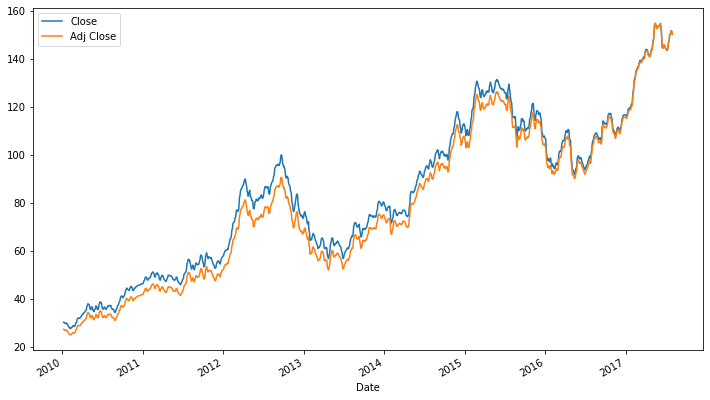

In [174]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

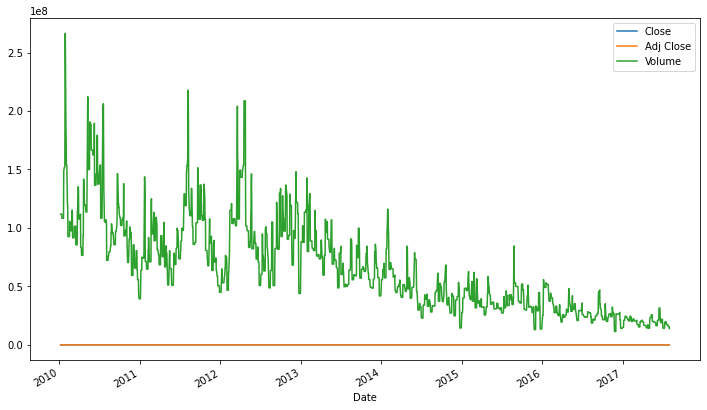

In [175]:
aapl.rolling(5)[['Close', 'Adj Close', 'Volume']].min().plot()

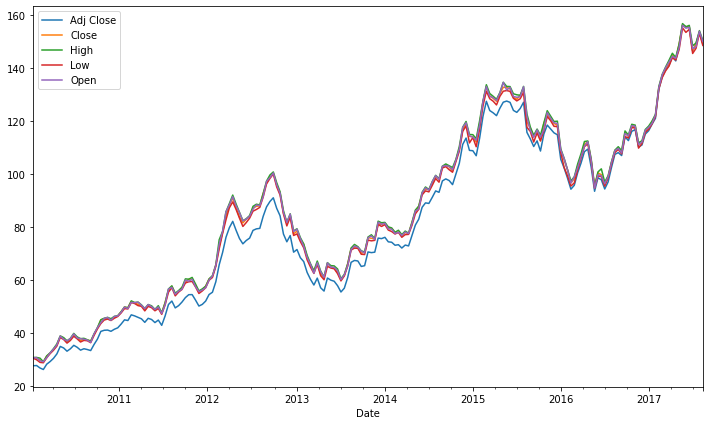

In [176]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

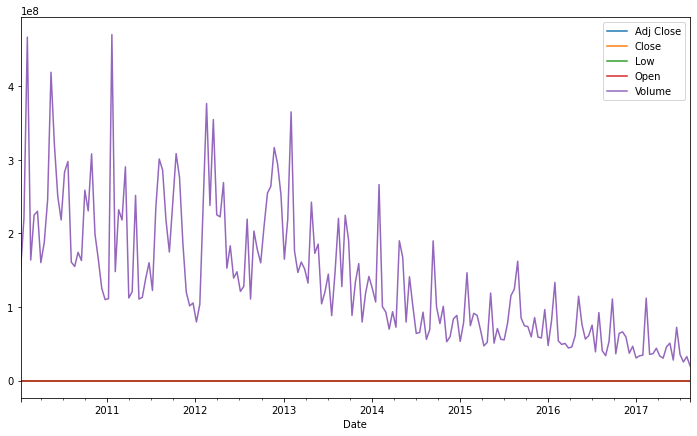

In [177]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('High', axis=1).resample('2W').max().plot();

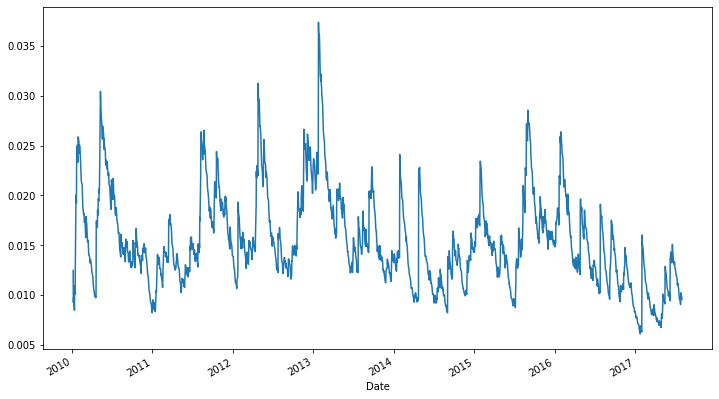

In [178]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

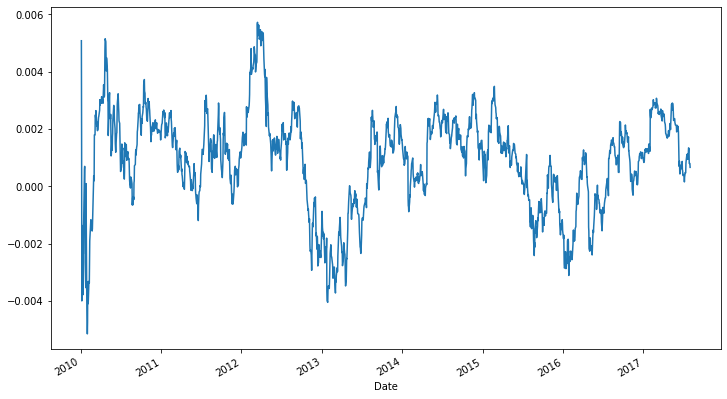

In [179]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['High'].pct_change().ewm(span=100).mean().plot();

## "Real World" Data

In [180]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [181]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2017')
avocados

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.50,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.50,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.50,1.99
...,...,...,...,...,...,...,...,...
1938,2015-12-18 00:00:00+00:00,SOUTHWEST,GREENSKIN,False,48,0.16,0.16,0.16
1939,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,False,676,1.45,0.68,2.50
1940,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,True,40,1.55,1.50,1.67
1941,2015-12-18 00:00:00+00:00,HAWAII,HASS,False,51,1.76,1.50,1.99


In [182]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [183]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.axes

[Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942],
            dtype='int64', length=1830),
 Index(['Date', 'Region', 'Variety', 'Organic', 'Number of Stores',
        'Weighted Avg Price', 'Low Price', 'High Price'],
       dtype='object')]

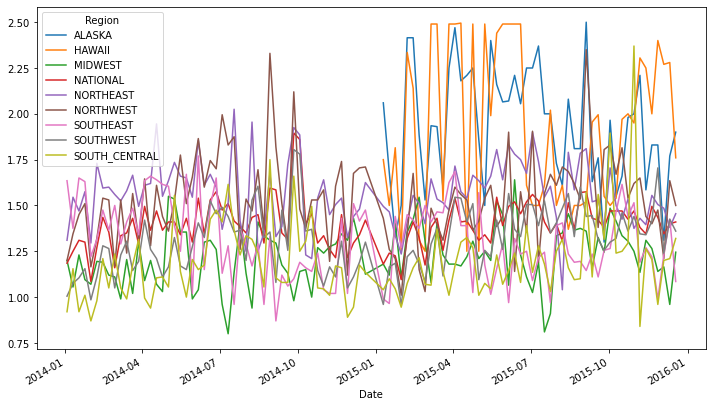

In [184]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

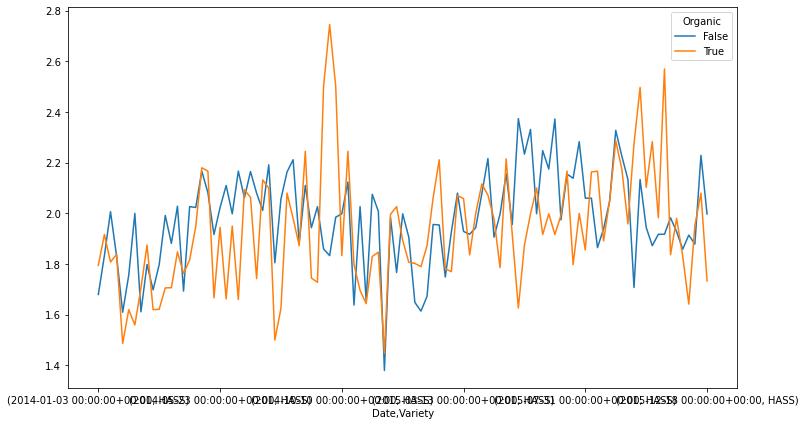

In [185]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Variety','Organic'])['High Price'].mean().unstack().ffill().plot();

In [186]:

def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [187]:

def _organic_spread2(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region2(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region' , 'Organic'])
         ['Low Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread2)
    )

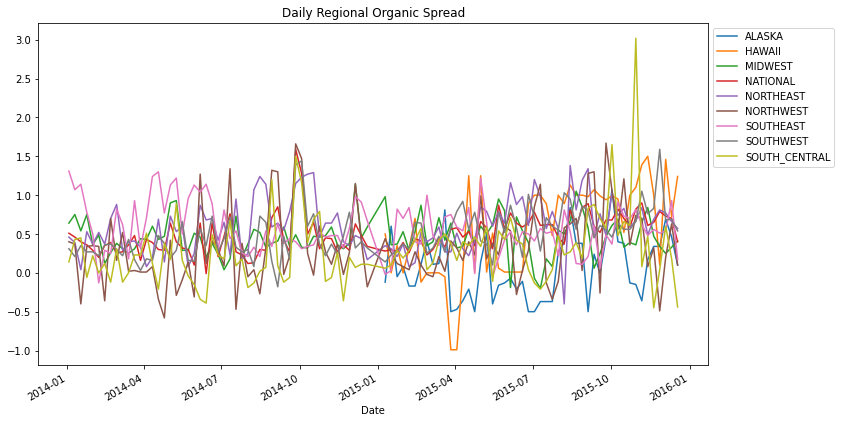

In [188]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

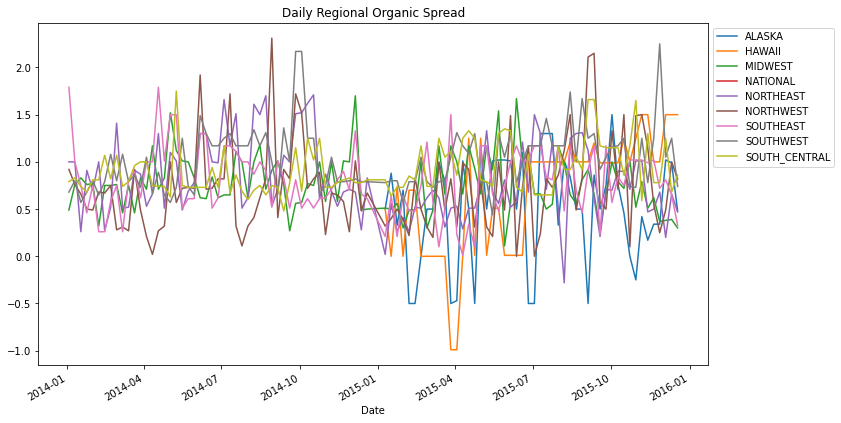

In [189]:
organic_spread_by_region2(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [190]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [191]:
spread_correlation2 = organic_spread_by_region2(hass).corr()
spread_correlation2.head()

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.150163,-0.119487,NaN,0.009338,0.083374,-0.029175,0.043336,-0.154564
HAWAII,0.150163,1.000000,-0.248487,NaN,0.157643,0.367625,0.135196,0.206836,0.066340
MIDWEST,-0.119487,-0.248487,1.000000,NaN,0.036771,-0.011297,0.211184,-0.098819,0.068035
NATIONAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NORTHEAST,0.009338,0.157643,0.036771,NaN,1.000000,0.144364,0.373265,0.363294,-0.096634


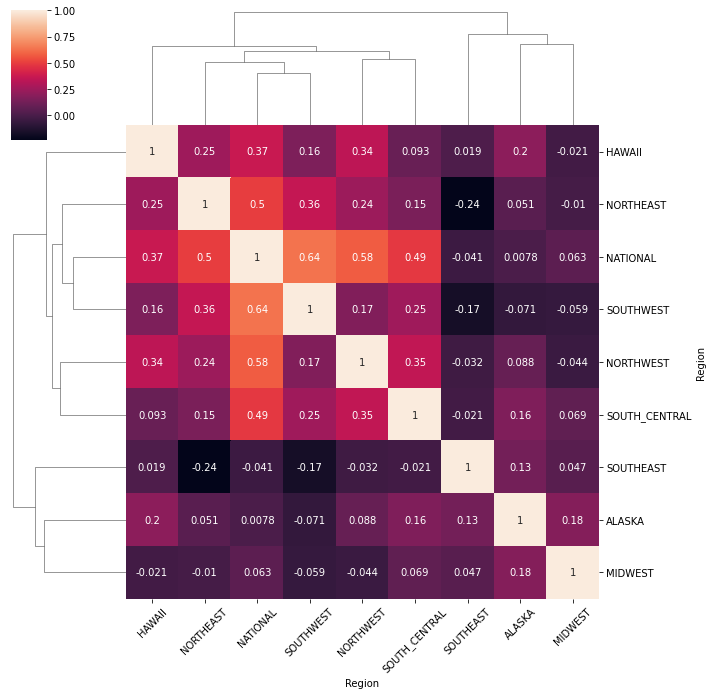

In [192]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

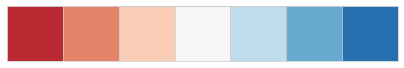

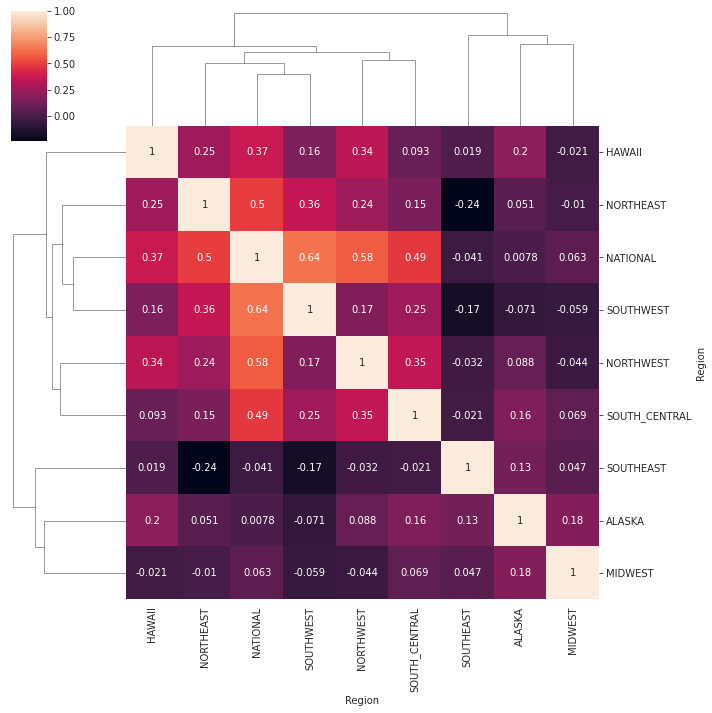

In [193]:
import seaborn as snb
snb.set_color_codes(palette='bright')
snb.set_palette("RdBu", n_colors=7)
snb.set_style("whitegrid")
snb.set_hls_values("Red")
snb.palplot(snb.color_palette("RdBu", n_colors=7))
snb.color_palette("RdBu", n_colors=7)
snb.clustermap(spread_correlation, annot=True)

## Pandas Review
Pandas extends numpy with more complex datastructures and algorithms.

If you understand numpy, you understand 90% of pandas.

groupby, set_index, and unstack are powerful tools for working with categorical data.

Avocado prices are surprisingly interesting :)

# **this information was taken from “The PyData Toolbox with Scott Sanderson” by Scott Sanderson**
https://github.com/ssanderson/pydata-toolbox